# Introduction à l'NLP (Natural Language Processing)

In [128]:
# Les applications NLP sont nombreuses et multiples :
# Reconnaissance vocales (Siri)
# Q & A (chatbots)
# Generation du text
# Classification
# Topic modelling ..

## 1) IMDB Dataset of 50K Movie Reviews

In [129]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [130]:
imdb_sentences = []
imdb_labels = []

In [131]:
train_data = tfds.as_numpy(tfds.load('imdb_reviews', split='train'))
train_data

In [132]:
for item in train_data:
  print(item)
  break

{'label': 0, 'text': b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."}


In [133]:
for item in train_data:
  imdb_sentences.append(str(item['text']))
  imdb_labels.append(item['label'])

In [134]:
print(len(imdb_sentences))
print(len(imdb_labels))

25000
25000


In [135]:
np.unique(imdb_labels)

array([0, 1])

In [136]:
print(imdb_sentences[25])

b"Well, i rented this movie and found out it realllllllly sucks. It is about that family with the stepmother and the same stupid fights in the family,then the cool son comes with his stupid camera and he likes to take a photo to damaged building and weird things and weird movie ,and then he asks his father to take him to a side trip and simply agrees, etc etc etc..... They go to that town which no one know it exists (blah blah blah) And the most annoying thing is that the movie ends and yet you don't understand what is THAT MOVIE!!!!I have seen many mystery movies but that was the worst, Honestly it doesn't have a description at all and i wish i didn't see it."


In [137]:
imdb_labels[25] # Commentaire négatif

0

In [138]:
training_sentences = imdb_sentences[:20000]
test_sentences = imdb_sentences[20000:]

training_labels = imdb_labels[:20000]
test_labels = imdb_labels[20000:]

In [139]:
len(training_sentences), len(test_sentences)

(20000, 5000)

In [140]:
len(training_labels), len(test_labels)

(20000, 5000)

## 2) La Tokenisation du Corpus


In [141]:
phrase = "Je suis au marché"

In [142]:
phrase.split(" ")

['Je', 'suis', 'au', 'marché']

In [143]:
phrases = ["Je suis au marché", "Je m'appelle Lina"]

In [144]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [145]:
tokenizer = Tokenizer()

In [146]:
tokenizer.fit_on_texts(phrases)

In [147]:
tokenizer.word_index

{'je': 1, 'suis': 2, 'au': 3, 'marché': 4, "m'appelle": 5, 'lina': 6}

In [148]:
tokenizer.index_word

{1: 'je', 2: 'suis', 3: 'au', 4: 'marché', 5: "m'appelle", 6: 'lina'}

In [149]:
# Transformer les tokens à des nombres
tokenizer.texts_to_sequences(phrases)

[[1, 2, 3, 4], [1, 5, 6]]

In [150]:
# tokenizer.sequences_to_texts([[1, 2, 3, 4], [1, 5, 6]])

In [151]:
test_sentence = ["Je vends au Marché"]

In [152]:
tokenizer.texts_to_sequences(test_sentence) # Je au marché

[[1, 3, 4]]

In [153]:
tokenizer.texts_to_sequences(["Hello world !"])

[[]]

In [154]:
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>") # out of vocabulary

In [155]:
tokenizer.fit_on_texts(phrases)

In [156]:
tokenizer.word_index

{'<OOV>': 1,
 'je': 2,
 'suis': 3,
 'au': 4,
 'marché': 5,
 "m'appelle": 6,
 'lina': 7}

In [157]:
tokenizer.texts_to_sequences(test_sentence) # Je <OOV> au marché

[[2, 1, 4, 5]]

## 3) Le Padding et Truncating du texte expliqué

### a) Le padding:

In [158]:
phrases = [
    "Je suis au marché",
    "es_tu rentré du marché?",
    "Je nettoie le marché tous les jours avant de commencer à vendre le matin"
]

tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer.fit_on_texts(phrases)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(phrases)

In [159]:
word_index

{'<OOV>': 1,
 'marché': 2,
 'je': 3,
 'le': 4,
 'suis': 5,
 'au': 6,
 'es': 7,
 'tu': 8,
 'rentré': 9,
 'du': 10,
 'nettoie': 11,
 'tous': 12,
 'les': 13,
 'jours': 14,
 'avant': 15,
 'de': 16,
 'commencer': 17,
 'à': 18,
 'vendre': 19,
 'matin': 20}

In [160]:
sequences

[[3, 5, 6, 2],
 [7, 8, 9, 10, 2],
 [3, 11, 4, 2, 12, 13, 14, 15, 16, 17, 18, 19, 4, 20]]

In [161]:
# Remarque : les phrases n'ont pas la méme taille, sauf si d'habitude on a le meme input shape
# solution ==> Le padding

In [162]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [163]:
sequences

[[3, 5, 6, 2],
 [7, 8, 9, 10, 2],
 [3, 11, 4, 2, 12, 13, 14, 15, 16, 17, 18, 19, 4, 20]]

In [164]:
# Pré-padding
pad_sequences(sequences) # 0 == Pas d'information

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  5,  6,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  8,  9, 10,  2],
       [ 3, 11,  4,  2, 12, 13, 14, 15, 16, 17, 18, 19,  4, 20]],
      dtype=int32)

In [165]:
# Post-padding
pad_sequences(sequences, padding="post")

array([[ 3,  5,  6,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  8,  9, 10,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 11,  4,  2, 12, 13, 14, 15, 16, 17, 18, 19,  4, 20]],
      dtype=int32)

In [166]:
# Mais imaginez que la plus longue phrases est de 10M de token !!
# solution: maxlen

In [167]:
pad_sequences(sequences, padding="post", maxlen=7, truncating="post")

array([[ 3,  5,  6,  2,  0,  0,  0],
       [ 7,  8,  9, 10,  2,  0,  0],
       [ 3, 11,  4,  2, 12, 13, 14]], dtype=int32)

## 4) Stop words

In [168]:
# L'objectif est de réduire le vocabulaire par réduction des stop words
# Les stop words sont des mots qui ne portent pas le sens dans la phrase
# mais juste pour avoir une phrase correcte

In [169]:
phrase = "Je vais au marché le jeudi"

In [170]:
stopwords = ["au", "le", "à"]

In [171]:
words = phrase.split(' ')
phrases_nettoyee = []

for word in words :
  if word not in stopwords:
    phrases_nettoyee.append(word)

In [172]:
phrases_nettoyee

['Je', 'vais', 'marché', 'jeudi']

In [173]:
" ".join(phrases_nettoyee)

'Je vais marché jeudi'

## 5) Extraction de Caractéristiques du texte


### a) Embedding concept (Plongement)

In [174]:
training_sentences[42]

'b\'One of the weaker Carry On adventures sees Sid James as the head of a crime gang stealing contraceptive pills. The fourth of the series to be hospital-based, it\\\'s possibly the least of the genre. There\\\'s a curiously flat feel throughout, with all seemingly squandered on below-par material. This is far from the late-70s nadir, but Williams, James, Bresslaw, Maynard et al. are all class performers yet not given the backing of a script equal to their ability.<br /><br />Most of the gags are onrunning, rather than episodic as Carry Ons usually are. So that instead of the traditional hit and miss ratio, if you don\\\'t find the joke funny in the first place you\\\'re stuck with it for most of the film. These continuous plot strands include Williams \\xc2\\x96 for no good reason \\xc2\\x96 worrying that he\\\'s changing sex, and Kenneth Cope in drag. Like the stagy physical pratt falls, the whole thing feels more contrived than in other movies, and lacking in cast interest. Continu

In [175]:
training_labels[42]

0

In [182]:
tokenizer = Tokenizer(num_words = 20000 ,oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [187]:
# word_index

In [188]:
len(word_index)

78371

In [227]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)

In [228]:
training_sequences

Output hidden; open in https://colab.research.google.com to view.

In [191]:
len(training_sequences)

20000

In [192]:
training_padded = pad_sequences(training_sequences,
                                padding="post",
                                maxlen=15,
                                truncating="post") # truncating est pré par défaut

In [193]:
training_padded

array([[  60,   12,   14, ..., 1379, 4051,   42],
       [ 252,   28,   78, ...,  646,  706,    6],
       [   1, 5898,    2, ..., 1255,    3, 2262],
       ...,
       [  60,  680,   11, ...,   20,   85,   76],
       [  60,  267,   11, ...,  598,    5,  785],
       [ 358, 2840,   20, ..., 5686, 6275,    3]], dtype=int32)

In [194]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)

In [195]:
test_padded = pad_sequences(test_sequences,
                            padding="post",
                            maxlen=15,
                            truncating="post")

In [196]:
test_padded

array([[  60,  312,  141, ...,    6,    2, 4273],
       [4324,   14, 2036, ...,   12,   20,  254],
       [ 252,  391, 9655, ...,   71,  116,  579],
       ...,
       [7213,   37,   11, ...,   73,  379,   23],
       [2763,   11,  216, ...,    5, 5331,   11],
       [3749,    5,   31, ...,    2,  168,   59]], dtype=int32)

In [197]:
test_padded[42]

array([ 778, 6991,    9, 1034,  553,   14,  393,   53,   39,    2,  148,
        150,  105,   45,   10], dtype=int32)

In [198]:
len(test_padded[42])

15

In [201]:
training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

In [203]:
len(training_labels)

20000

In [204]:
training_labels

array([0, 0, 0, ..., 0, 0, 0])

# Entrainement du modéle

In [205]:
tf.keras.layers.Embedding(20000, 20)

In [206]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(20000, 20),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
        ]
)

In [207]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 20)          400000    
                                                                 
 global_average_pooling1d (  (None, 20)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 400177 (1.53 MB)
Trainable params: 400177 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [210]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.keras",
                                               monitor="val_accuracy",
                                               mod="max",
                                               save_best_only=True)

stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)

In [211]:
20*8+8

168

In [212]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [215]:
h = model.fit(training_padded, training_labels, epochs=50,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 4s 6ms/step - loss: 0.4008 - accuracy: 0.8217 - val_loss: 0.6173 - val_accuracy: 0.6980
Epoch 2/50
625/625 [==============================] - 4s 6ms/step - loss: 0.3617 - accuracy: 0.8424 - val_loss: 0.6538 - val_accuracy: 0.6910
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 0.3313 - accuracy: 0.8595 - val_loss: 0.6967 - val_accuracy: 0.6856
Epoch 4/50
625/625 [==============================] - 4s 6ms/step - loss: 0.3069 - accuracy: 0.8702 - val_loss: 0.7391 - val_accuracy: 0.6854
Epoch 5/50
625/625 [==============================] - 4s 6ms/step - loss: 0.2867 - accuracy: 0.8796 - val_loss: 0.7816 - val_accuracy: 0.6858
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2704 - accuracy: 0.8864 - val_loss: 0.8319 - val_accuracy: 0.6784
Epoch 7/50
625/625 [==============================] - 4s 7ms/step - loss: 0.2567 - accuracy: 0.8924 - val_loss: 0.8691 - val_accuracy: 0.6780
Epoch 

In [218]:
import matplotlib.pyplot as plt

In [219]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.xlabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

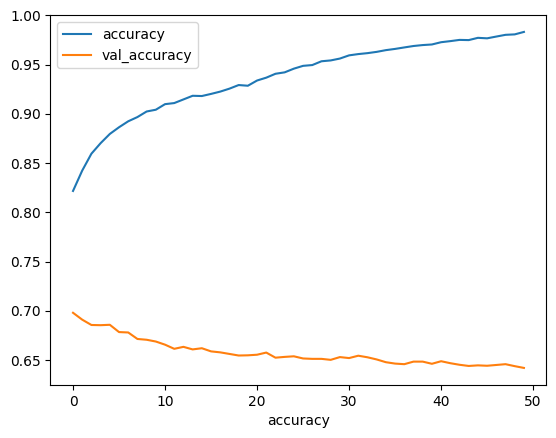

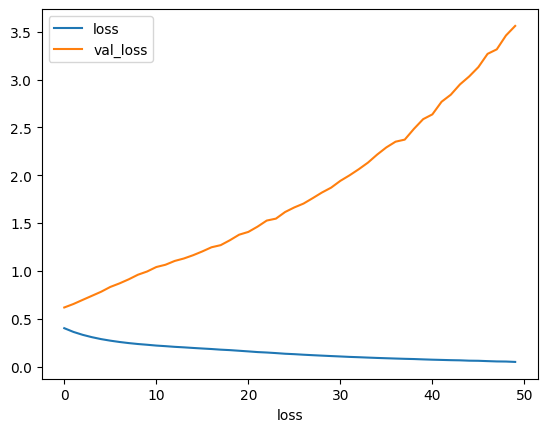

In [220]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

In [221]:
# Il s'agit clairement d'un overfitting

# Amélioration du modéle

## 1) La taille du Vocabulaire


In [222]:
len(word_index)

78371

In [ ]:
tokenizer = Tokenizer(num_words = 20000 ,oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [229]:
# vocab_size = 1 : Modéle faible
# vocab_seize = 78371 ==> 78371*20 params : Trop de temps pour des mots qui peuvent ne pas etre necessaire ou qui apparaissent trés peu

In [231]:
wc = tokenizer.word_counts

In [242]:
wc = sorted(wc.items(), key = lambda t: t[1], reverse=True )# [:5] Pour simplifier la visualisation

In [243]:
import pandas as pd

In [244]:
df = pd.DataFrame(wc, columns=["Token", "Frequence"])

In [249]:
df

,Token,Frequence
0,the,268774
1,and,131448
2,a,130000
3,of,116684
4,to,108554
...,...,...
78365,mirna,1
78366,xa8calling,1
78367,vitagraph,1
78368,cornel,1


In [254]:
df[df['Frequence'] > 10]

,Token,Frequence
0,the,268774
1,and,131448
2,a,130000
3,of,116684
4,to,108554
...,...,...
17156,crockett,11
17157,liliom,11
17158,nikhil,11
17159,hanka,11


In [255]:
test_tok = Tokenizer()
test_tok.fit_on_texts(test_sentences)

In [258]:
test_words = test_tok.word_index.keys()

In [259]:
test_words

dict_keys(['the', 'a', 'and', 'of', 'to', 'is', 'br', 'in', 'it', 'i', 'this', 'that', 'was', 'as', 'with', 'for', 'movie', 'but', 'film', "'s", 'on', 'you', 'not', 'he', 'are', 'his', 'have', 'be', 'one', 'all', 'by', 'at', 'an', 'they', 'who', 'from', 'so', 'like', 'her', 'just', 'or', "'t", 'about', 'has', 'out', 'there', "'", 'if', 'some', 'good', 'what', 'more', 'when', 'very', 'she', 'up', 'b', 'no', 'even', 'can', 'time', 'my', 'which', 'only', 'story', 'would', 'really', 'see', 'their', 'had', 'were', 'well', 'me', 'we', 'than', 'much', 'get', 'bad', 'because', 'great', 'other', 'into', 'will', 'been', 'people', 'first', 'also', 'most', 'him', 'how', 'do', 'made', 'them', 'way', 'then', 'too', 'could', 'its', "it's", 'make', 'any', 'movies', 'after', 'think', 'films', 'characters', 'watch', 'seen', 'life', 'many', 'character', 'two', 'little', 'know', 'acting', 'best', 'plot', 'where', 'show', 'being', 'off', 'did', 'over', 'never', 'does', 'love', 'ever', 'man', 'here', 'bette

In [260]:
train_words = tokenizer.word_index.keys()

In [261]:
train_words

dict_keys(['<OOV>', 'the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i', 'this', 'that', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', "'s", 'on', 'you', 'not', 'his', 'are', 'he', 'have', 'be', 'one', 'all', 'at', 'by', 'they', 'an', 'who', 'so', 'from', 'like', "'t", 'her', 'or', 'just', 'there', 'about', 'out', "'", 'if', 'has', 'what', 'some', 'good', 'more', 'very', 'when', 'she', 'can', 'up', 'time', 'b', 'even', 'no', 'would', 'my', 'which', 'story', 'only', 'really', 'see', 'their', 'had', 'were', 'me', 'well', 'we', 'than', 'much', 'been', 'do', 'get', 'bad', 'will', 'people', 'also', 'other', 'into', 'because', 'great', 'first', 'him', 'how', 'most', 'made', 'its', 'then', 'make', 'way', 'them', 'could', 'too', 'movies', 'any', "it's", 'after', 'think', 'characters', 'watch', 'two', 'character', 'films', 'many', 'being', 'seen', 'plot', 'life', 'never', 'love', 'acting', 'little', 'best', 'where', 'over', 'did', 'show', 'know', 'ever', 'off', 'does', 'better', 'y

In [262]:
len(train_words), len(test_words)

(78371, 42047)

In [263]:
intersection = set(train_words).intersection(test_words)

In [265]:
len(intersection)

33879

##2) La dimension des Vecteurs Embeddings: Embedding dim


In [ ]:
# Générallement le embedding_dim est la racine quatriéme du vocab_size
# Valeur recommandée

In [288]:
vocab_size = 33879
embedding_dim = np.power(vocab_size, 1/4)

13

In [289]:
tokenizer = Tokenizer(num_words = vocab_size ,oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post", maxlen=300, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post", maxlen=300, truncating="post")

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, int(np.trunc(embedding_dim))),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
        ]
)

In [290]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 13)          440427    
                                                                 
 global_average_pooling1d_6  (None, 13)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_12 (Dense)            (None, 8)                 112       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 440548 (1.68 MB)
Trainable params: 440548 (1.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [291]:
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=6, restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
h = model.fit(training_padded, training_labels, epochs=50,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp, stop])

Epoch 1/50
625/625 [==============================] - 6s 9ms/step - loss: 0.6001 - accuracy: 0.7375 - val_loss: 0.4373 - val_accuracy: 0.8312
Epoch 2/50
625/625 [==============================] - 7s 11ms/step - loss: 0.3301 - accuracy: 0.8828 - val_loss: 0.3098 - val_accuracy: 0.8832
Epoch 3/50
625/625 [==============================] - 6s 9ms/step - loss: 0.2309 - accuracy: 0.9162 - val_loss: 0.2836 - val_accuracy: 0.8878
Epoch 4/50
625/625 [==============================] - 6s 10ms/step - loss: 0.1772 - accuracy: 0.9398 - val_loss: 0.2849 - val_accuracy: 0.8836
Epoch 5/50
625/625 [==============================] - 6s 10ms/step - loss: 0.1382 - accuracy: 0.9551 - val_loss: 0.2803 - val_accuracy: 0.8908
Epoch 6/50
625/625 [==============================] - 5s 9ms/step - loss: 0.1086 - accuracy: 0.9660 - val_loss: 0.2907 - val_accuracy: 0.8910
Epoch 7/50
625/625 [==============================] - 7s 11ms/step - loss: 0.0847 - accuracy: 0.9757 - val_loss: 0.3136 - val_accuracy: 0.8848
Ep

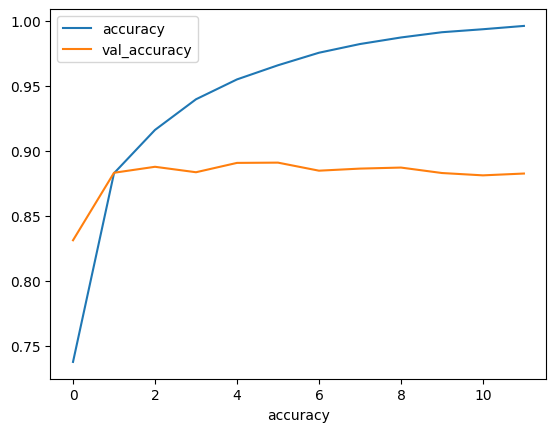

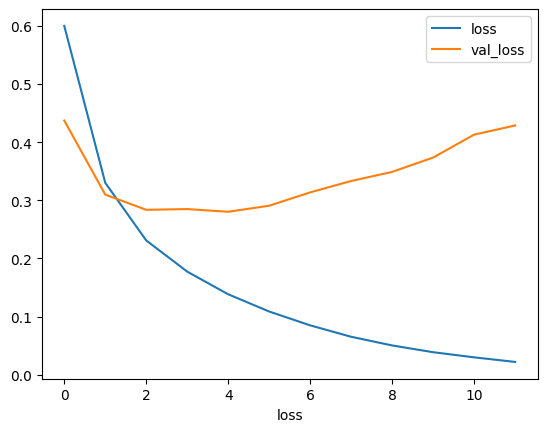

In [292]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

##4) Modifier L'architecture du Modèle


In [296]:
tokenizer = Tokenizer(num_words = vocab_size ,oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post", maxlen=300, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post", maxlen=300, truncating="post")

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, int(np.trunc(embedding_dim))),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(5, activation="relu"),
        tf.keras.layers.Dense(3, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
        ]
)

stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
h = model.fit(training_padded, training_labels, epochs=50,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp, stop])

Epoch 1/50
625/625 [==============================] - 6s 9ms/step - loss: 0.6543 - accuracy: 0.6194 - val_loss: 0.5529 - val_accuracy: 0.7904
Epoch 2/50
625/625 [==============================] - 9s 15ms/step - loss: 0.4428 - accuracy: 0.8607 - val_loss: 0.3922 - val_accuracy: 0.8790
Epoch 3/50
625/625 [==============================] - 7s 11ms/step - loss: 0.3091 - accuracy: 0.9134 - val_loss: 0.3341 - val_accuracy: 0.8828
Epoch 4/50
625/625 [==============================] - 6s 10ms/step - loss: 0.2307 - accuracy: 0.9384 - val_loss: 0.3095 - val_accuracy: 0.8862
Epoch 5/50
625/625 [==============================] - 5s 9ms/step - loss: 0.1775 - accuracy: 0.9549 - val_loss: 0.3163 - val_accuracy: 0.8866
Epoch 6/50
625/625 [==============================] - 7s 11ms/step - loss: 0.1392 - accuracy: 0.9660 - val_loss: 0.3222 - val_accuracy: 0.8862
Epoch 7/50
625/625 [==============================] - 7s 10ms/step - loss: 0.1098 - accuracy: 0.9745 - val_loss: 0.3249 - val_accuracy: 0.8858
E

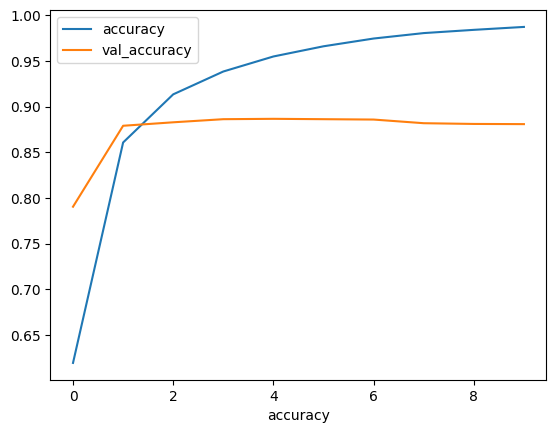

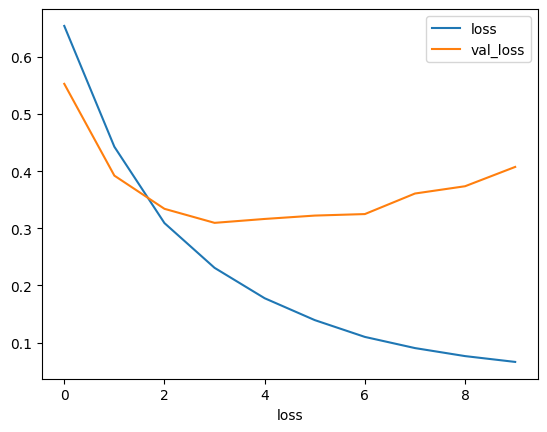

In [297]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

##4) La Taille Maximale des phrases et Dropout


In [303]:
tailles = []

for sent in training_sentences:
  tailles.append(len(sent.split(" ")))

In [304]:
np.array(tailles).min(), np.array(tailles).max(), np.array(tailles).mean(), np.median(tailles)

(10, 2470, 233.90165, 174.0)

In [309]:
maxlen = int(np.median(tailles))
maxlen

174

In [312]:
tokenizer = Tokenizer(num_words = vocab_size ,oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post", maxlen=maxlen, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post", maxlen=maxlen, truncating="post")

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, int(np.trunc(embedding_dim))),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(5, activation="relu"),
        tf.keras.layers.Dropout(0.25), # Ajouter le Dropout
        tf.keras.layers.Dense(3, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
        ]
)

stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
h = model.fit(training_padded, training_labels, epochs=50,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp, stop])

Epoch 1/50
625/625 [==============================] - 7s 9ms/step - loss: 0.5903 - accuracy: 0.7211 - val_loss: 0.4104 - val_accuracy: 0.8544
Epoch 2/50
625/625 [==============================] - 7s 11ms/step - loss: 0.3430 - accuracy: 0.8663 - val_loss: 0.3367 - val_accuracy: 0.8576
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2381 - accuracy: 0.9173 - val_loss: 0.3144 - val_accuracy: 0.8720
Epoch 4/50
625/625 [==============================] - 6s 9ms/step - loss: 0.1728 - accuracy: 0.9426 - val_loss: 0.3365 - val_accuracy: 0.8690
Epoch 5/50
625/625 [==============================] - 6s 10ms/step - loss: 0.1297 - accuracy: 0.9614 - val_loss: 0.3694 - val_accuracy: 0.8666
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0995 - accuracy: 0.9722 - val_loss: 0.4142 - val_accuracy: 0.8618
Epoch 7/50
625/625 [==============================] - 6s 10ms/step - loss: 0.0744 - accuracy: 0.9819 - val_loss: 0.4751 - val_accuracy: 0.8570
Epo

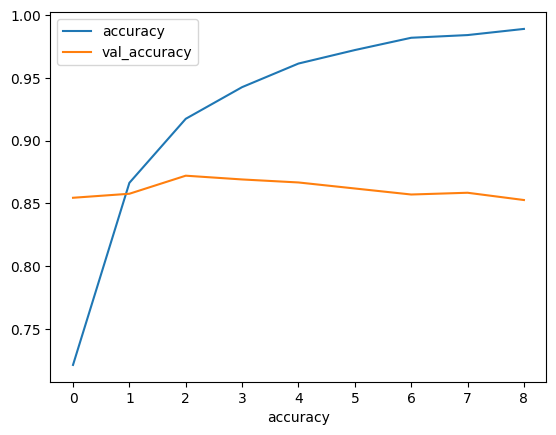

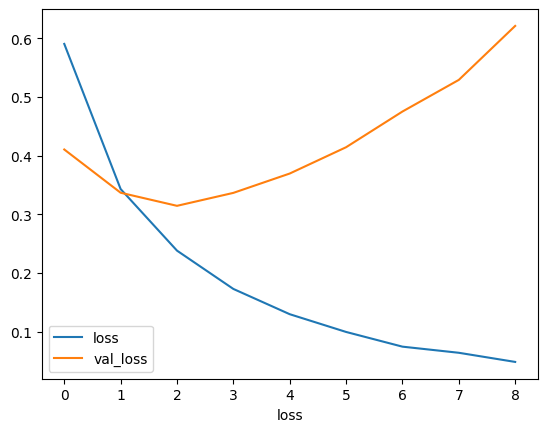

In [313]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

# Transfert Learning pou les données textuelles

In [314]:
# !pip install --upgrade tensorflow_hub

In [331]:
import tensorflow_hub as hub

In [360]:
embed = hub.load("https://www.kaggle.com/models/google/gnews-swivel/TensorFlow2/tf2-preview-20dim/1")
embeddings = embed(["cat is on the mat", "dog is in the fog"])

In [361]:
embeddings

<tf.Tensor: shape=(2, 20), dtype=float32, numpy=
array([[ 0.8666395 ,  0.35917717,  0.00579667,  0.681002  , -0.54226625,
         0.22343189, -0.38796625,  0.62195706,  0.22117122, -0.48538068,
        -1.2674141 ,  0.886369  , -0.32849073, -0.13924702, -0.53327686,
         0.5739708 , -0.05905761,  0.13629246, -1.1718255 , -0.31494334],
       [ 0.9602181 ,  0.62520486,  0.06261905,  0.37425604,  0.24782333,
        -0.39351934, -0.7418429 ,  0.56599647, -0.26197797, -0.69016844,
        -0.76565284,  0.71412426, -0.4537978 , -0.50701594, -0.8499377 ,
         0.8917156 , -0.30278975,  0.2149126 , -1.1098894 , -0.46719775]],
      dtype=float32)>

In [369]:
train_data, test_data = tfds.as_numpy(tfds.load('imdb_reviews', split=['train', 'test'],
                                                batch_size=-1, as_supervised=True))
train_examples, train_labels = train_data
test_examples, test_labels = test_data

In [375]:
train_examples[0]

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [376]:
train_labels[0]

0

In [370]:
len(train_examples), len(train_labels)

(25000, 25000)

In [371]:
len(test_examples), len(test_labels)

(25000, 25000)

In [377]:
training_sentences = train_examples[:20000]
training_labels = train_labels[:20000]

test_sentences = train_examples[20000:]
test_labels = train_labels[20000:]


In [378]:
hub_layer = hub.KerasLayer("https://www.kaggle.com/models/google/gnews-swivel/TensorFlow2/tf2-preview-20dim/1", output_shape=[20],
                           input_shape=[], dtype=tf.string)

In [379]:
model = tf.keras.models.Sequential(
    [
        hub_layer,
        tf.keras.layers.Dense(5, activation="relu"),
        tf.keras.layers.Dropout(0.25), # Ajouter le Dropout
        tf.keras.layers.Dense(3, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
        ]
)

stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

h = model.fit(training_sentences, training_labels, epochs=50,
              validation_data=(test_sentences, test_labels),
              callbacks=[model_ckp, stop])

Epoch 1/50
625/625 [==============================] - 6s 8ms/step - loss: 0.8988 - accuracy: 0.5272 - val_loss: 0.6773 - val_accuracy: 0.5602
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 0.6599 - accuracy: 0.6101 - val_loss: 0.6290 - val_accuracy: 0.6642
Epoch 3/50
625/625 [==============================] - 4s 7ms/step - loss: 0.6377 - accuracy: 0.6441 - val_loss: 0.6120 - val_accuracy: 0.6846
Epoch 4/50
625/625 [==============================] - 6s 10ms/step - loss: 0.6235 - accuracy: 0.6616 - val_loss: 0.6040 - val_accuracy: 0.6906
Epoch 5/50
625/625 [==============================] - 5s 7ms/step - loss: 0.6166 - accuracy: 0.6668 - val_loss: 0.5969 - val_accuracy: 0.6916
Epoch 6/50
625/625 [==============================] - 4s 6ms/step - loss: 0.6091 - accuracy: 0.6747 - val_loss: 0.5870 - val_accuracy: 0.6980
Epoch 7/50
625/625 [==============================] - 5s 9ms/step - loss: 0.6050 - accuracy: 0.6797 - val_loss: 0.5906 - val_accuracy: 0.6986
Epoch

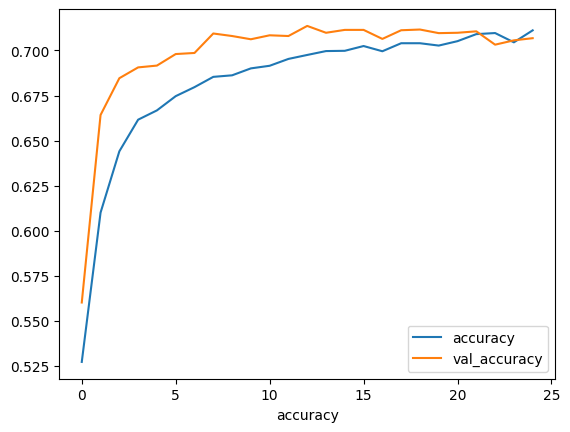

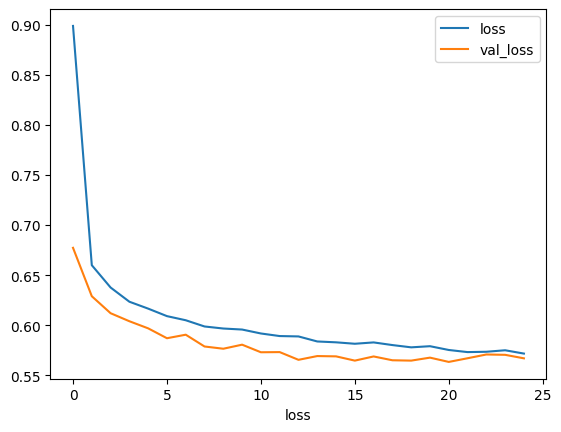

In [380]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

In [ ]:
# https://projector.tensorflow.org/